In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read raw data csv file
df = pd.read_csv('data/Marketing.csv', index_col = 0)

#id: Unique identifier for each entry
#c_date: Date of the campaign
#campaign_name: Name of the campaign
#category: Category of the campaign (e.g., social, search, influencer, media)
#campaign_id: Unique identifier for each campaign
#impressions: Number of impressions generated by the campaign
#mark_spent: Amount spent on the campaign
#clicks: Number of clicks received
#leads: Number of leads generated
#orders: Number of orders made
#revenue: Revenue generated from the campaign

In [6]:
df.head()

,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
id,,,,,,,,,,
1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0


In [8]:
df.dtypes

c_date            object
campaign_name     object
category          object
campaign_id        int64
impressions        int64
mark_spent       float64
clicks             int64
leads              int64
orders             int64
revenue          float64
dtype: object

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

c_date           0
campaign_name    0
category         0
campaign_id      0
impressions      0
mark_spent       0
clicks           0
leads            0
orders           0
revenue          0
dtype: int64

In [14]:
df

,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
id,,,,,,,,,,
1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0
...,...,...,...,...,...,...,...,...,...,...
304,2021-02-28,instagram_tier2,social,983498,775780,760.75,1024,4,0,0.0
305,2021-02-28,facebook_retargeting,social,4387490,1933,224.81,58,0,0,0.0
306,2021-02-28,facebook_lal,social,544756,25840,6844.80,248,5,1,1491.0


In [15]:
df['category'].unique()

array(['social', 'search', 'influencer', 'media'], dtype=object)

In [22]:
df_influencer = df[df['category'] == 'influencer']
df_social= df[df['category'] == 'social']
df_search = df[df['category'] == 'search']
df_media = df[df['category'] == 'media']

In [18]:
df_influencer.head()

,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
id,,,,,,,,,,
5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.2,2258,49,10,84490.0
10,2021-02-01,instagram_blogger,influencer,374754,120436,23604.1,1498,49,7,39081.0
16,2021-02-02,youtube_blogger,influencer,10934,449200,42301.1,4492,85,17,149141.0
21,2021-02-02,instagram_blogger,influencer,374754,299600,13919.1,2996,19,3,14466.0
27,2021-02-03,youtube_blogger,influencer,10934,1035261,189341.0,13503,455,91,772499.0


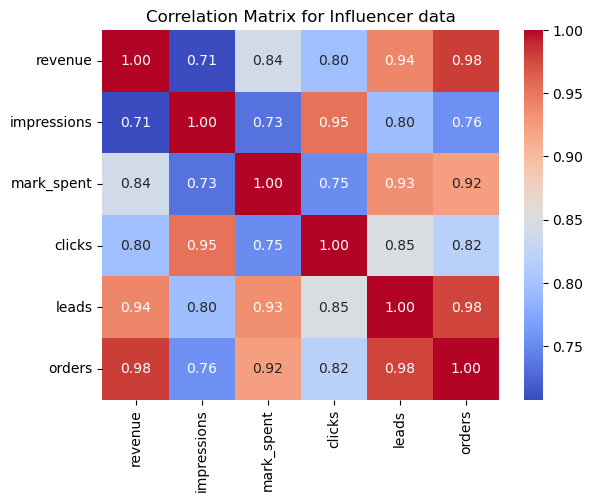

In [21]:
#correlation matrix for influencer
corr_matrix = df_influencer[['revenue','impressions', 'mark_spent', 'clicks', 'leads', 'orders']].corr()

# heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Influencer data')
plt.show()

/var/folders/j4/yzb5zc_s27jb7rrtr1_c00h80000gn/T/ipykernel_18233/1954828574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_influencer['ROI'] = ((df_influencer['revenue'] - df_influencer['mark_spent']) / df_influencer['mark_spent']) * 100


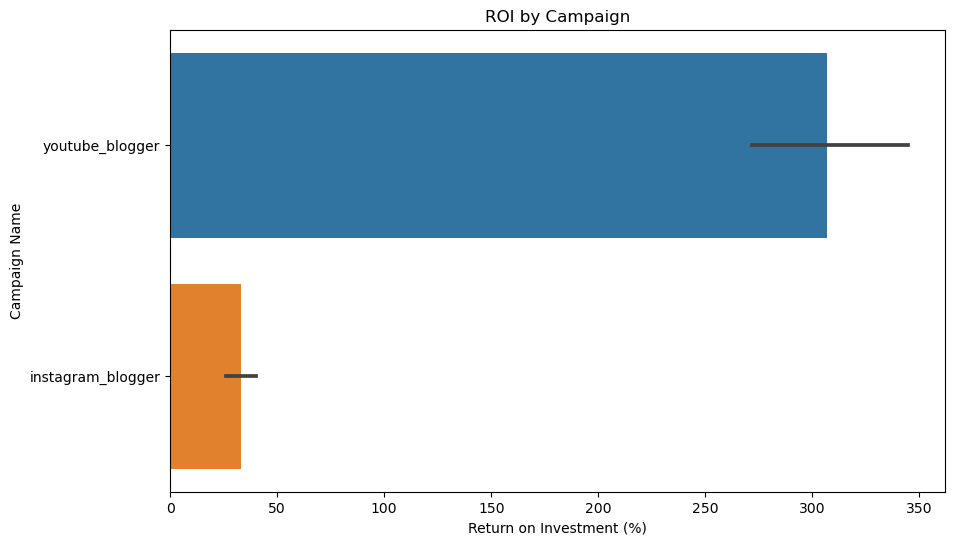

In [26]:
# Calculate ROI for influencer
df_influencer['ROI'] = ((df_influencer['revenue'] - df_influencer['mark_spent']) / df_influencer['mark_spent']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='ROI', y='campaign_name', data=df_influencer.sort_values('ROI', ascending=False))
plt.title('ROI by Campaign')
plt.xlabel('Return on Investment (%)')
plt.ylabel('Campaign Name')
plt.show()

/var/folders/j4/yzb5zc_s27jb7rrtr1_c00h80000gn/T/ipykernel_18233/2440077030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_influencer['c_date'] = pd.to_datetime(df_influencer['c_date'])


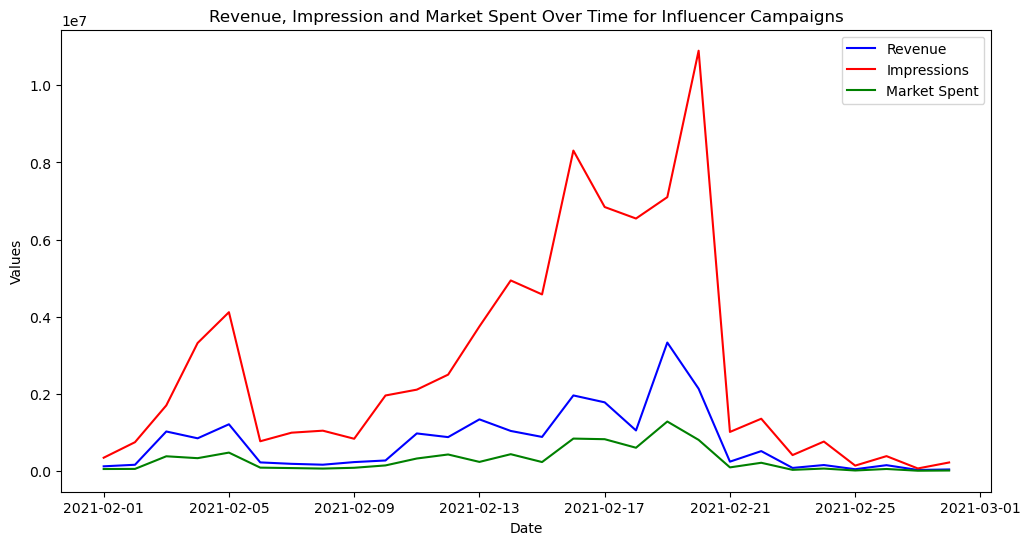

In [36]:
# visualize revenue and impression over time for influencer data 
df_influencer['c_date'] = pd.to_datetime(df_influencer['c_date'])

revenue_data = df_influencer.groupby('c_date')['revenue'].sum()
impressions_data = df_influencer.groupby('c_date')['impressions'].sum()
mark_spent_data = df_influencer.groupby('c_date')['mark_spent'].sum()


# Create a figure and a set of subplots
plt.figure(figsize=(12, 6))

# Plot Revenue Over Time
revenue_plot = plt.plot(revenue_data.index, revenue_data, label='Revenue', color='blue')

# Plot Impressions Over Time on the same axis
impressions_plot = plt.plot(impressions_data.index, impressions_data, label='Impressions', color='red')

mark_spent_plot = plt.plot(mark_spent_data.index, mark_spent_data, label='Market Spent', color='green')


# Adding titles and labels
plt.title('Revenue, Impression and Market Spent Over Time for Influencer Campaigns')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()  # This adds a legend to distinguish the two lines


plt.savefig('Over_Time.png')
plt.show()


In [37]:
import statsmodels.api as sm

# Assume df_influencer is your DataFrame and it's already preprocessed
X = df_influencer[['impressions', 'mark_spent', 'clicks', 'leads']]  # predictors
y = df_influencer['revenue']  # response variable

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     119.5
Date:                Thu, 23 May 2024   Prob (F-statistic):           3.00e-25
Time:                        00:49:37   Log-Likelihood:                -749.00
No. Observations:                  56   AIC:                             1508.
Df Residuals:                      51   BIC:                             1518.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.48e+04   3.06e+04     -0.483      

In [38]:
import statsmodels.api as sm

# Interaction between leads and another variable (e.g., clicks)
df_influencer['leads_impressions'] = df_influencer['leads'] * df_influencer['impressions']

X = df_influencer[['leads', 'impressions', 'leads_impressions']]  # Include the interaction term
y = df_influencer['revenue']

X = sm.add_constant(X)  # Adding a constant for intercept
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     140.3
Date:                Thu, 23 May 2024   Prob (F-statistic):           6.55e-25
Time:                        01:07:13   Log-Likelihood:                -752.69
No. Observations:                  56   AIC:                             1513.
Df Residuals:                      52   BIC:                             1521.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.432e+04   4.03e+0

/var/folders/j4/yzb5zc_s27jb7rrtr1_c00h80000gn/T/ipykernel_18233/77537611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_influencer['leads_impressions'] = df_influencer['leads'] * df_influencer['impressions']


In [39]:
import statsmodels.api as sm

# Assume df_influencer is preprocessed and ready for modeling
X = df_influencer[['leads']]  # Predictor
y = df_influencer['revenue']  # Response

X = sm.add_constant(X)  # adding a constant for intercept

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     407.0
Date:                Thu, 23 May 2024   Prob (F-statistic):           8.20e-27
Time:                        01:07:53   Log-Likelihood:                -754.45
No. Observations:                  56   AIC:                             1513.
Df Residuals:                      54   BIC:                             1517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.886e+04   3.08e+04     -0.936      0.3

/var/folders/j4/yzb5zc_s27jb7rrtr1_c00h80000gn/T/ipykernel_18233/1017262648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_influencer['c_date'] = pd.to_datetime(df_influencer['c_date'])
/Users/eloiseyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eloiseyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eloiseyu/anaconda3/lib/py

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                   56
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -796.206
Date:                Thu, 23 May 2024   AIC                           1598.413
Time:                        01:13:30   BIC                           1604.435
Sample:                             0   HQIC                          1600.741
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2928      0.193     -1.520      0.128      -0.670       0.085
ma.L1         -0.5364      0.189     -2.843      0.004      -0.906      -0.167
sigma2      2.319e+11   2.25e-12   1.03e+23      0.0

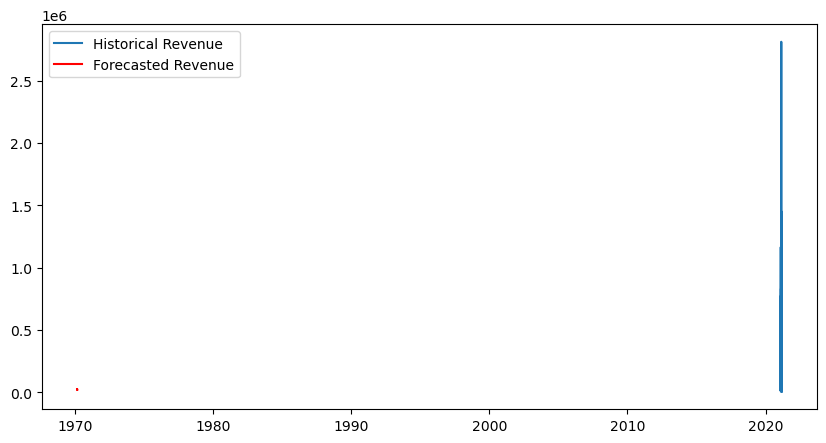

In [40]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assume 'c_date' is the column with dates and 'revenue' is the revenue data
df_influencer['c_date'] = pd.to_datetime(df_influencer['c_date'])
df_influencer.set_index('c_date', inplace=True)
ts_revenue = df_influencer['revenue']

# Fit an ARIMA model
model = ARIMA(ts_revenue, order=(1,1,1))  # these orders are usually chosen based on ACF and PACF plots
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Future Forecast
forecast = model_fit.forecast(steps=5)  # Forecast the next 5 periods
plt.figure(figsize=(10,5))
plt.plot(ts_revenue, label='Historical Revenue')
plt.plot(forecast, label='Forecasted Revenue', color='red')
plt.legend()
plt.show()


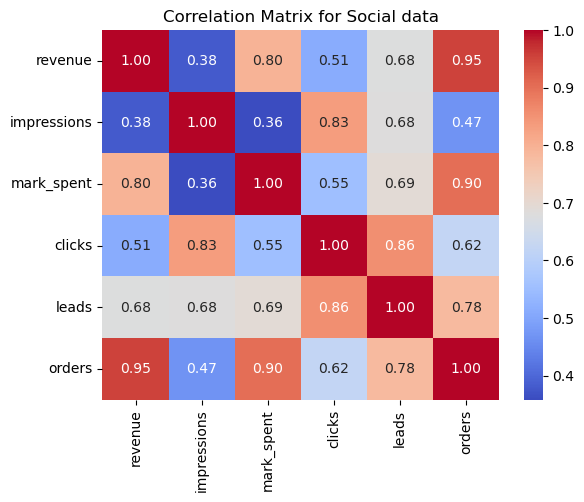

In [23]:
#correlation matrix for social
corr_matrix = df_social[['revenue','impressions', 'mark_spent', 'clicks', 'leads', 'orders']].corr()

# heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Social data')
plt.show()

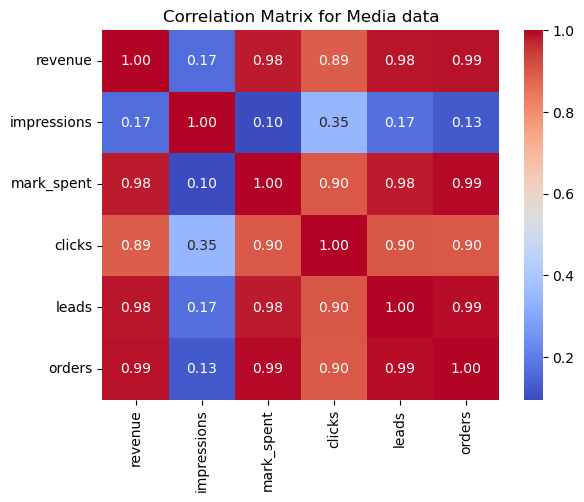

In [24]:
#correlation matrix for media
corr_matrix = df_media[['revenue','impressions', 'mark_spent', 'clicks', 'leads', 'orders']].corr()

# heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Media data')
plt.show()

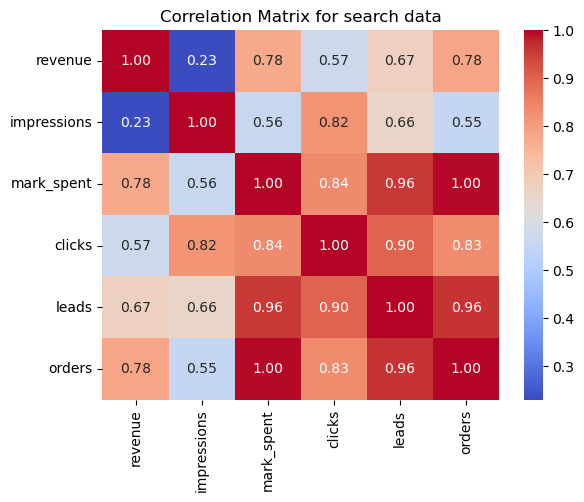

In [25]:
#correlation matrix for search
corr_matrix = df_search[['revenue','impressions', 'mark_spent', 'clicks', 'leads', 'orders']].corr()

# heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for search data')
plt.show()